# Exploring Layer Effects in CNNs
Objective: Understand the impact of varying parameters in convolutional and pooling layers on image processing.

## Setup


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [8]:
# Load and prepare data
path = "material/pixel.jpg" # replace with your own image if you want (remove or edit rotatio to fit new pic).
img = Image.open(path).convert('L').resize((150,150)) 
image_array = tf.keras.utils.img_to_array(img) # Convert to tensor
image_array = tf.expand_dims(image_array, 0)  # Create a batch

## Exercise 
Let's create a function to build and visualize CNN Layers. Read through the code below and make sure you understand it.

1/1 [==============================] - 0s 435ms/step


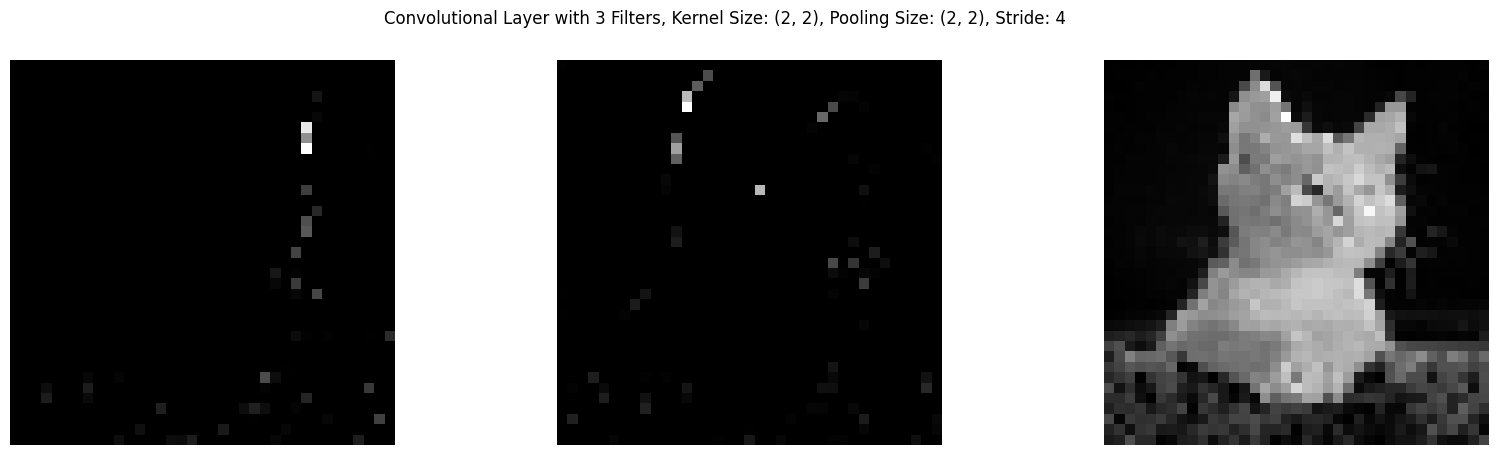

In [9]:
#tf.keras.utils.set_random_seed(42)
def build_and_visualize_cnn(filters, kernel_size, pooling_size, stride):
    inputs = Input(shape=(150, 150, 1))
    x = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(inputs)
    x = MaxPooling2D(pool_size=pooling_size, strides=stride)(x)
    model = Model(inputs=inputs, outputs=x)

    feature_maps = model.predict(image_array)
    fm = feature_maps[0]

    fig, ax = plt.subplots(1, filters, figsize=(20, 5))
    for i in range(filters):
        ax[i].imshow(fm[:, :, i], cmap='gray')
        ax[i].axis('off')
    plt.suptitle(f'Convolutional Layer with {filters} Filters, Kernel Size: {kernel_size}, '
                 f'Pooling Size: {pooling_size}, Stride: {stride}')
    plt.show()


build_and_visualize_cnn(filters=3, kernel_size=(2, 2), pooling_size=(2, 2), stride=4)


What happens if you...

1. Run the above cell several times in a row?
    * Why does the output change?
    * How could you avoid that?
      - tf.keras.utils.set_random_seed(42)
    * Why do we sometimes want to avoid this?

2. Change number of filters?
  - we have many features 
3. Increase the stride? Why?
  - Notice more pixels
4. Increase the pooling size? Why?
  - It zoom the picture pixels

5. Change the kernel size?

## Bonus exercise:
What happens if you make the network deeper? How does the output feature maps change? Edit the network above to add another layer and experiment with the hyperparameters.